In [1]:
import pandas as pd

import sys
import os
project_root = os.path.abspath("..")  # Add the project root to the Python path
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    sys.path.append(os.path.abspath('../src/'))

from src.data_preprocessing import DataPreprocessor


file_path = (
    "../data/raw/financial_regression.csv"  # Adjust the path based on your directory structure
)
data_preprocessor = DataPreprocessor(file_path)
df = data_preprocessor.load_data(file_path)
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [2]:
# columns_backfill = ['us_rates_%','CPI','GDP']
# df_back = df
# df_back[columns_backfill] = df_back[columns_backfill].fillna(method='bfill')

In [3]:
# df_back.loc[:,('date','us_rates_%','CPI','GDP')].head(50)

In [4]:
df.dtypes

date                   object
sp500 open            float64
sp500 high            float64
sp500 low             float64
sp500 close           float64
sp500 volume          float64
sp500 high-low        float64
nasdaq open           float64
nasdaq high           float64
nasdaq low            float64
nasdaq close          float64
nasdaq volume         float64
nasdaq high-low       float64
us_rates_%            float64
CPI                   float64
usd_chf               float64
eur_usd               float64
GDP                   float64
silver open           float64
silver high           float64
silver low            float64
silver close          float64
silver volume         float64
silver high-low       float64
oil open              float64
oil high              float64
oil low               float64
oil close             float64
oil volume            float64
oil high-low          float64
platinum open         float64
platinum high         float64
platinum low          float64
platinum c

In [5]:
columns_to_interploate = ['us_rates_%','CPI','GDP','usd_chf','eur_usd']
df['date']  = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df[columns_to_interploate] = df[columns_to_interploate].interpolate(method='time')
df.reset_index(inplace=True)
df[columns_to_interploate] = df[columns_to_interploate].fillna(method='bfill')

#df.head(50)

In [6]:
#df[columns_to_interploate] = df[columns_to_interploate].fillna(method='bfill')

In [7]:

# df.head()
df.loc[0:20,('us_rates_%','CPI','GDP','usd_chf','eur_usd')]

,us_rates_%,CPI,GDP,usd_chf,eur_usd
0,0.130000,217.281000,14980.193,1.0206,1.447800
1,0.130000,217.281000,14980.193,1.0264,1.437600
2,0.130000,217.281000,14980.193,1.0321,1.429575
3,0.130000,217.281000,14980.193,1.0340,1.426900
4,0.130000,217.281000,14980.193,1.0453,1.409400
5,0.130000,217.281000,14980.193,1.0426,1.410600
6,0.130000,217.281000,14980.193,1.0400,1.415400
7,0.130000,217.281000,14980.193,1.0403,1.414600
8,0.130000,217.281000,14980.193,1.0466,1.406300
9,0.130000,217.281000,14980.193,1.0472,1.405300


In [8]:
df = df.dropna(subset=['date','gold close'])

In [9]:
df.isna().sum()

date                  0
sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
us_rates_%            0
CPI                   0
usd_chf               0
eur_usd               0
GDP                   0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-l

In [10]:
duplicates = df['date'].duplicated().sum()
duplicates

0

In [11]:
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0
5,2010-01-21,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,...,46.98,45.07,45.30,388457.0,1.91,108.48,108.78,106.61,107.37,25747831.0


In [12]:
df.loc[100:150,('us_rates_%','CPI','GDP','usd_chf','eur_usd')]

,us_rates_%,CPI,GDP,usd_chf,eur_usd
100,0.180000,217.212533,15090.167374,1.1575,1.2206
101,0.180000,217.226067,15091.941154,1.1540,1.2193
102,0.180000,217.239600,15093.714934,1.1614,1.1998
103,0.180000,217.280200,15099.036275,1.1613,1.1959
104,0.180000,217.293733,15100.810055,1.1510,1.1995
105,0.180000,217.307267,15102.583835,1.1455,1.2045
106,0.180000,217.320800,15104.357615,1.1418,1.2111
107,0.180000,217.334333,15106.131396,1.1521,1.2077
108,0.180000,217.374933,15111.452736,1.1378,1.2277
109,0.180000,217.388467,15113.226516,1.1310,1.2327


In [13]:
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0
5,2010-01-21,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,...,46.98,45.07,45.30,388457.0,1.91,108.48,108.78,106.61,107.37,25747831.0


In [14]:
import numpy as np

In [ ]:
# Create numeric features from date
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days
df['month'] = df['date'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Drop raw date column
df = df.drop(columns=['date','month'])

In [16]:
df.head()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high-low,gold open,gold high,gold low,gold close,gold volume,days_since_start,month,month_sin,month_cos
0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,...,1.16,111.51,112.37,110.79,112.03,18305238.0,0,1,0.5,0.866025
1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,...,1.36,111.35,112.01,110.38,110.86,18000724.0,1,1,0.5,0.866025
3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,...,1.38,110.95,111.75,110.83,111.52,10467927.0,5,1,0.5,0.866025
4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,...,2.14,109.97,110.05,108.46,108.94,17534231.0,6,1,0.5,0.866025
5,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,45.49,...,1.91,108.48,108.78,106.61,107.37,25747831.0,7,1,0.5,0.866025


In [17]:
nulls = df.isnull().sum().sum()

In [18]:
nulls

0

# Running the LSTM model

In [28]:
import pandas as pd

import sys
import os
project_root = os.path.abspath("..")  # Add the project root to the Python path
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    sys.path.append(os.path.abspath('../src/'))

from src.data_preprocessing import DataPreprocessor 
from src.feature_engineering import FeatureEngineering
from src.lstm import lstm
from src.feature_selection import FeatureSelectionWithRFE
from src.evaluate import ModelEvaluator


In [29]:

# Test the preprocessing
file_path = (
    "./data/raw/financial_regression.csv"  # Adjust the path based on your directory structure
)

In [30]:
# Creating an instance of the DataPreprocessor class
dp = DataPreprocessor(file_path=file_path)

# Calling the preprocess method which which will perform all the preprocessing steps
df_preprocess = dp.preprocess()

# Creating an instance of the feature engineering class
ft = FeatureEngineering(df=df_preprocess, dependent_variable='gold close')

df_transformed = ft.data_transformation()

Data has been loaded
No null values found
Data is saved


In [31]:
df_transformed

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold volume,days_since_start,month_sin,month_cos,gold close
0,-1.270967,-1.270730,-1.265986,-1.267529,0.046746,-0.866654,-1.103567,-1.103690,-1.101662,-1.102769,...,-1.114946,-1.126631,-1.113514,2.991326,-0.429607,1.398865,-1.731300,0.712098,1.264762,112.03
1,-1.268989,-1.273189,-1.276099,-1.278157,1.446430,-0.520342,-1.101933,-1.103447,-1.106356,-1.107179,...,-1.102285,-1.117136,-1.097564,3.784859,-0.350968,1.349603,-1.730658,0.712098,1.264762,110.86
3,-1.278136,-1.270812,-1.272866,-1.266458,0.380345,-0.557985,-1.106017,-1.102718,-1.103885,-1.101136,...,-1.079700,-1.094277,-1.077107,5.694478,-0.343105,0.131002,-1.728091,0.712098,1.264762,111.52
4,-1.272697,-1.276385,-1.277922,-1.276098,1.505513,-0.584334,-1.103485,-1.103009,-1.108168,-1.106607,...,-1.075765,-1.103596,-1.075200,5.837980,-0.044278,1.274137,-1.727449,0.712098,1.264762,108.94
5,-1.275664,-1.277860,-1.289692,-1.294140,3.366088,-0.117565,-1.105200,-1.105068,-1.109239,-1.110118,...,-1.081411,-1.105354,-1.105539,3.235764,-0.134712,2.602874,-1.726807,0.712098,1.264762,107.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,2.613555,2.589495,2.610944,2.583436,-1.130501,0.352968,2.572798,2.543429,2.563092,2.530016,...,-0.242249,-0.235481,-0.232106,-0.196964,-0.301465,-0.725060,1.727960,-1.209013,0.743903,248.63
3900,2.598393,2.583511,2.614426,2.601891,-1.086700,-0.079923,2.553361,2.535973,2.580469,2.556311,...,-0.180071,-0.187477,-0.166573,1.362000,0.054020,-0.295158,1.728602,-1.209013,0.743903,251.27
3901,2.596580,2.579086,2.598015,2.593982,-1.100867,0.462094,2.546747,2.541322,2.564079,2.564069,...,-0.202485,-0.211742,-0.203154,1.590482,0.081544,-0.064636,1.730527,-1.209013,0.743903,251.22
3902,2.573508,2.576217,2.596191,2.591428,-1.133542,0.413196,2.542500,2.551170,2.569515,2.568478,...,-0.181270,-0.175344,-0.167440,0.661282,-0.244846,-0.631208,1.731169,-1.209013,0.743903,253.93


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
#a%pip install lightgbm

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from lightgbm import LGBMRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [35]:
# Assuming 'data' is your preprocessed pandas dataframe

# Separate the target and features
X = df_transformed.drop(columns=['gold close'])
y = df_transformed['gold close']

In [36]:
# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)



In [37]:
fs = FeatureSelectionWithRFE(X_train, y_train, X_test, n_features_to_select=10)

In [38]:
X_train_selected, X_test_selected = fs.perform_feature_selection()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10986
[LightGBM] [Info] Number of data points in the train set: 2603, number of used features: 45
[LightGBM] [Info] Start training from score 130.398183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10731
[LightGBM] [Info] Number of data points in the train set: 2603, number of used features: 44
[LightGBM] [Info] Start training from score 130.398183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10476
[LightGBM] [Info] Number of data points in the train set: 2603, number of used features: 43
[LightGBM] [Info] Start

In [44]:
ls = lstm(X_train_selected, y_train, X_test_selected, y_test, units=64, epochs=100, batch_size=16, patience=50, monitor='val_loss')

In [46]:
ls.build_model()

Model built and compiled.


In [47]:
ls.train_model()

Epoch 1/100
163/163 [==============================] - 18s 41ms/step - loss: 16076.4980 - val_loss: 31465.3301
Epoch 2/100
163/163 [==============================] - 4s 27ms/step - loss: 15076.5205 - val_loss: 30618.3086
Epoch 3/100
163/163 [==============================] - 5s 29ms/step - loss: 14381.3896 - val_loss: 29682.2812
Epoch 4/100
 55/163 [=========>....................] - ETA: 2s - loss: 14059.6514

KeyboardInterrupt: 

In [181]:
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd

# Assuming X_train, y_train, X_test are pandas DataFrames
# Fit the RFE model to select top 10 features
lgbm_estimator = LGBMRegressor()
rfe = RFE(estimator=lgbm_estimator, n_features_to_select=10)

# Fit the model on training data
rfe.fit(X_train, y_train)

# Get the selected feature mask and indices
selected_features_mask = rfe.support_
selected_features_indices = np.where(selected_features_mask)[0]

# Create new datasets with only the selected features using iloc for pandas DataFrame indexing
X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# Print the selected feature indices
print("Selected feature indices:", selected_features_indices)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10986
[LightGBM] [Info] Number of data points in the train set: 2603, number of used features: 45
[LightGBM] [Info] Start training from score 130.398183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10731
[LightGBM] [Info] Number of data points in the train set: 2603, number of used features: 44
[LightGBM] [Info] Start training from score 130.398183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10476
[LightGBM] [Info] Number of data points in the train set: 2603, number of used features: 43
[LightGBM] [Info] Start

In [40]:

# Convert DataFrame to NumPy array and reshape
X_train_selected = X_train_selected.to_numpy().reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1)
X_test_selected = X_test_selected.to_numpy().reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [173]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Initialize a Sequential model
model_uni_lstm = Sequential()

# Add the first LSTM layer with 64 units and input shape specified for timesteps and features
model_uni_lstm.add(LSTM(units=64, input_shape=(X_train_selected.shape[1], 1), return_sequences=True))

# Add a second LSTM layer with 32 units, returning sequences to feed into the next LSTM layer
model_uni_lstm.add(LSTM(units=32, return_sequences=True))

# Add a third LSTM layer with 16 units, this is the final LSTM layer (no return_sequences)
model_uni_lstm.add(LSTM(units=16))

# Add a Dense layer with 1 unit to predict the target value
model_uni_lstm.add(Dense(1))

# Compile the model using Mean Squared Error as the loss function and Adam optimizer
model_uni_lstm.compile(loss="mse", optimizer="adam")

# Define an EarlyStopping callback to monitor the 'loss' metric and stop training when it stops improving
callback = EarlyStopping(monitor="loss", patience=50, verbose=1, mode="auto")

# Fit the model on the training data
# Reshape X_train_selected to match LSTM input requirements (samples, timesteps, features)
# Use validation_data for evaluating performance on the test set during training
history_uni_lstm = model_uni_lstm.fit(
    X_train_selected.reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1),  # Reshaped training data
    y_train,  # Target values for training
    epochs=200,  # Maximum number of epochs
    callbacks=[callback],  # Add early stopping to stop training early if no improvement
    batch_size=16,  # Set the batch size
    validation_data=(
        X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1),  # Reshaped test data
        y_test  # Target values for testing
    )
)

# Predict on the test data
# Reshape X_test_selected to match LSTM input requirements (samples, timesteps, features)
y_pred_uni_lstm = model_uni_lstm.predict(
    X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)
)

# The predictions are stored in y_pred_uni_lstm

Epoch 1/200
163/163 [==============================] - 34s 115ms/step - loss: 16210.6924 - val_loss: 32376.4082
Epoch 2/200
163/163 [==============================] - 16s 95ms/step - loss: 15216.7695 - val_loss: 32016.6562
Epoch 3/200
163/163 [==============================] - 16s 97ms/step - loss: 14494.4619 - val_loss: 31698.4941
Epoch 4/200
163/163 [==============================] - 16s 95ms/step - loss: 13828.9561 - val_loss: 31395.7559
Epoch 5/200
163/163 [==============================] - 16s 97ms/step - loss: 13197.1406 - val_loss: 31096.4238
Epoch 6/200
163/163 [==============================] - 16s 99ms/step - loss: 12591.8184 - val_loss: 30799.0391
Epoch 7/200
163/163 [==============================] - 16s 98ms/step - loss: 12009.8506 - val_loss: 30503.8203
Epoch 8/200
163/163 [==============================] - 16s 101ms/step - loss: 11449.4160 - val_loss: 30209.0938
Epoch 9/200
163/163 [==============================] - 16s 101ms/step - loss: 10908.8818 - val_loss: 29914.630

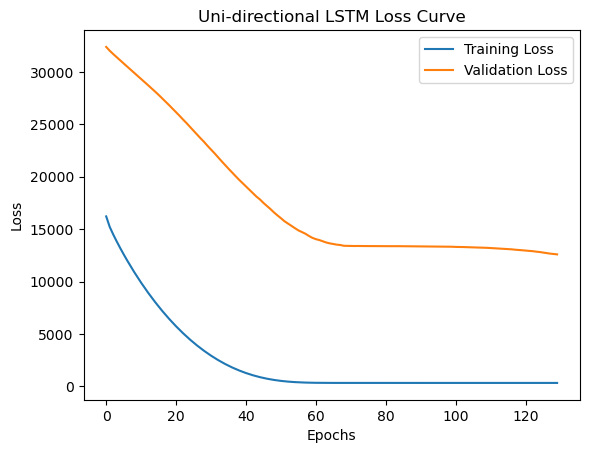

In [174]:
# Plot the loss curve for Uni-directional LSTM
plt.plot(history_uni_lstm.history['loss'], label='Training Loss')
plt.plot(history_uni_lstm.history['val_loss'], label='Validation Loss')
plt.title('Uni-directional LSTM Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [175]:
y_pred_uni_lstm = model_uni_lstm.predict(X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1))

35/35 [==============================] - 1s 28ms/step


In [176]:
y_pred_uni_lstm

array([[130.37167  ],
       [130.37167  ],
       [130.37167  ],
       ...,
       [  1.8857689],
       [  1.8422804],
       [  2.1354885]], dtype=float32)

In [177]:
y_test

2734    164.26
2735    164.65
2736    162.25
2737    163.21
2739    160.89
         ...  
3899    248.63
3900    251.27
3901    251.22
3902    253.93
3903    250.87
Name: gold close, Length: 1116, dtype: float64

35/35 [==============================] - 1s 30ms/step


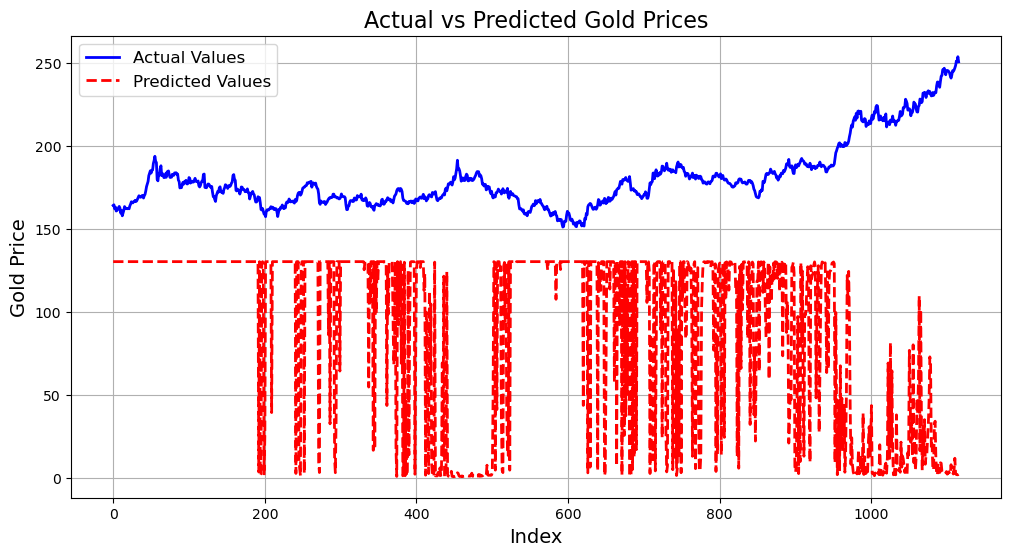

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape X_test_selected directly
X_test_selected_array = X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)

# Generate predictions
y_pred_uni_lstm = model_uni_lstm.predict(X_test_selected_array).flatten()

# Ensure that y_test and y_pred have the same length
# If they are in pandas DataFrames, reset indices or use numpy directly
if isinstance(y_test, np.ndarray):  # if y_test is a numpy array
    y_test_aligned = y_test
else:
    y_test_aligned = y_test.values  # if it's a pandas DataFrame/Series, convert to numpy array

# Align indices for plotting (assuming you are using numpy arrays)
plt.figure(figsize=(12, 6))
plt.plot(y_test_aligned, label='Actual Values', color='blue', linewidth=2)
plt.plot(y_pred_uni_lstm, label='Predicted Values', color='red', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Gold Prices', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Gold Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()